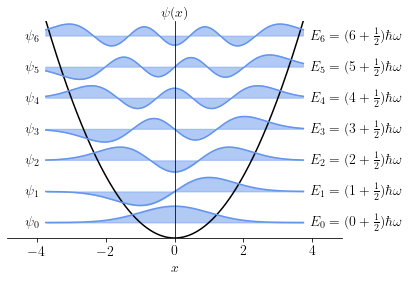

In [10]:
import numpy as np
from matplotlib import rc
import math
import matplotlib.pyplot as plt
rc('font', **{'family': 'serif', 'serif': ['Computer Modern'], 'size': 14})
rc('text', usetex=True)

# PLOT_PROB=False plots the wavefunction, psi; PLOT_PROB=True plots |psi|^2
PLOT_PROB = False

# Maximum vibrational quantum number to calculate wavefunction for
VMAX = 6

# Some appearance settings
# Pad the q-axis on each side of the maximum turning points by this fraction
QPAD_FRAC = 1.3
# Scale the wavefunctions by this much so they don't overlap
SCALING = 0.7
# Colours of the positive and negative parts of the wavefunction
COLOUR1 = 'cornflowerblue'

# Normalization constant and energy for vibrational state v
N = lambda v: 1./np.sqrt(np.sqrt(np.pi)*2**v*math.factorial(v))
get_E = lambda v: v + 0.5

def make_Hr():
    """Return a list of np.poly1d objects representing Hermite polynomials."""

    # Define the Hermite polynomials up to order VMAX by recursion:
    # H_[v] = 2qH_[v-1] - 2(v-1)H_[v-2]
    Hr = [None] * (VMAX + 1)
    Hr[0] = np.poly1d([1.,])
    Hr[1] = np.poly1d([2., 0.])
    for v in range(2, VMAX+1):
        Hr[v] = Hr[1]*Hr[v-1] - 2*(v-1)*Hr[v-2]
    return Hr

Hr = make_Hr()

def get_psi(v, x):
    """Return the harmonic oscillator wavefunction for level v on grid x."""
    return N(v)*Hr[v](x)*np.exp(-x*x/2.)

def get_turning_points(v):
    """Return the classical turning points for state v."""
    qmax = np.sqrt(2. * get_E(v + 0.5))
    return -qmax, qmax

def get_potential(x):
    """Return potential energy on scaled oscillator displacement grid x."""
    return x**2 / 2


fig, ax = plt.subplots()
xmin, xmax = get_turning_points(VMAX)
zmin, zmax = QPAD_FRAC * xmin, QPAD_FRAC * xmax
x = np.linspace(xmin, xmax, 500)
V = get_potential(x)

def plot_func(ax, f, scaling=1, yoffset=0):
    """Plot f*scaling with offset yoffset.

    The curve around the offset is filled with COLOUR1;

    """
    ax.plot(x, f*scaling + yoffset, color=COLOUR1)
    ax.fill_between(x, f*scaling + yoffset, yoffset, f > 0.,
                    color=COLOUR1, alpha=0.5)
    ax.fill_between(x, f*scaling + yoffset, yoffset, f < 0.,
                    color=COLOUR1, alpha=0.5)

# Plot the potential, V(x).
ax.plot(x, V, color='k', linewidth=1.5)

# Plot each of the wavefunctions (or probability distributions) up to VMAX.
for v in range(VMAX+1):
    psi_v = get_psi(v, x)
    E_v = get_E(v)
    if PLOT_PROB:
        plot_func(ax, psi_v**2, scaling=SCALING*1.5, yoffset=E_v)
    else:
        plot_func(ax, psi_v, scaling=SCALING, yoffset=E_v)
    # Label energy levels, E = (v+0.5).hbar.omega.
    ax.text(s=r'$E_{{{}}} = ({}+\frac{{1}}{{2}})\hbar\omega$'.format(v,v), x=xmax+0.2,
            y=E_v, va='center')
    # Label the vibrational levels.
    ax.text(s=r'$\psi_{{{}}}$'.format(v), x=xmin-0.2, y=E_v, va='center', ha='right')

# The top of the plot, plus a bit.
ymax = E_v+0.5

if PLOT_PROB:
    ylabel = r'$|\psi(x)|^2$'
else:
    ylabel = r'$\psi(x)$'
ax.text(s=ylabel, x=0, y=ymax, va='bottom', ha='center')

ax.set_xlabel('$x$')
ax.set_xlim(zmin, zmax)
ax.set_ylim(0, ymax)
ax.spines['left'].set_position('center')
ax.set_yticks([])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.savefig('qho-psi{}.png'.format(PLOT_PROB+1),bbox_inches='tight', dpi=300)
plt.show()

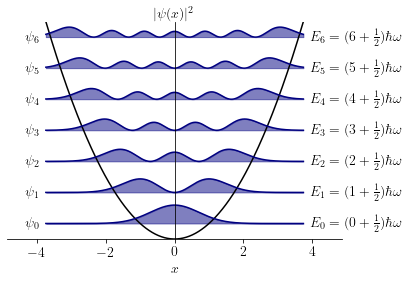

In [9]:
import numpy as np
from matplotlib import rc
import math
import matplotlib.pyplot as plt
rc('font', **{'family': 'serif', 'serif': ['Computer Modern'], 'size': 14})
rc('text', usetex=True)

# PLOT_PROB=False plots the wavefunction, psi; PLOT_PROB=True plots |psi|^2
PLOT_PROB = True

# Maximum vibrational quantum number to calculate wavefunction for
VMAX = 6

# Some appearance settings
# Pad the q-axis on each side of the maximum turning points by this fraction
QPAD_FRAC = 1.3
# Scale the wavefunctions by this much so they don't overlap
SCALING = 0.7
# Colours of the positive and negative parts of the wavefunction
COLOUR1 = 'navy'

# Normalization constant and energy for vibrational state v
N = lambda v: 1./np.sqrt(np.sqrt(np.pi)*2**v*math.factorial(v))
get_E = lambda v: v + 0.5

def make_Hr():
    """Return a list of np.poly1d objects representing Hermite polynomials."""

    # Define the Hermite polynomials up to order VMAX by recursion:
    # H_[v] = 2qH_[v-1] - 2(v-1)H_[v-2]
    Hr = [None] * (VMAX + 1)
    Hr[0] = np.poly1d([1.,])
    Hr[1] = np.poly1d([2., 0.])
    for v in range(2, VMAX+1):
        Hr[v] = Hr[1]*Hr[v-1] - 2*(v-1)*Hr[v-2]
    return Hr

Hr = make_Hr()

def get_psi(v, x):
    """Return the harmonic oscillator wavefunction for level v on grid x."""
    return N(v)*Hr[v](x)*np.exp(-x*x/2.)

def get_turning_points(v):
    """Return the classical turning points for state v."""
    qmax = np.sqrt(2. * get_E(v + 0.5))
    return -qmax, qmax

def get_potential(x):
    """Return potential energy on scaled oscillator displacement grid x."""
    return x**2 / 2


fig, ax = plt.subplots()
xmin, xmax = get_turning_points(VMAX)
zmin, zmax = QPAD_FRAC * xmin, QPAD_FRAC * xmax
x = np.linspace(xmin, xmax, 500)
V = get_potential(x)

def plot_func(ax, f, scaling=1, yoffset=0):
    """Plot f*scaling with offset yoffset.

    The curve around the offset is filled with COLOUR1;

    """
    ax.plot(x, f*scaling + yoffset, color=COLOUR1)
    ax.fill_between(x, f*scaling + yoffset, yoffset, f > 0.,
                    color=COLOUR1, alpha=0.5)
    ax.fill_between(x, f*scaling + yoffset, yoffset, f < 0.,
                    color=COLOUR1, alpha=0.5)

# Plot the potential, V(x).
ax.plot(x, V, color='k', linewidth=1.5)

# Plot each of the wavefunctions (or probability distributions) up to VMAX.
for v in range(VMAX+1):
    psi_v = get_psi(v, x)
    E_v = get_E(v)
    if PLOT_PROB:
        plot_func(ax, psi_v**2, scaling=SCALING*1.5, yoffset=E_v)
    else:
        plot_func(ax, psi_v, scaling=SCALING, yoffset=E_v)
    # Label energy levels, E = (v+0.5).hbar.omega.
    ax.text(s=r'$E_{{{}}} = ({}+\frac{{1}}{{2}})\hbar\omega$'.format(v,v), x=xmax+0.2,
            y=E_v, va='center')
    # Label the vibrational levels.
    ax.text(s=r'$\psi_{{{}}}$'.format(v), x=xmin-0.2, y=E_v, va='center', ha='right')

# The top of the plot, plus a bit.
ymax = E_v+0.5

if PLOT_PROB:
    ylabel = r'$|\psi(x)|^2$'
else:
    ylabel = r'$\psi(x)$'
ax.text(s=ylabel, x=0, y=ymax, va='bottom', ha='center')

ax.set_xlabel('$x$')
ax.set_xlim(zmin, zmax)
ax.set_ylim(0, ymax)
ax.spines['left'].set_position('center')
ax.set_yticks([])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.savefig('qho-psi{}.png'.format(PLOT_PROB+1),bbox_inches='tight', dpi=300)
plt.show()